In [1]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
#setting the path to the directory containing the pics
#path = 'images'
#os.chdir(path)
#path = os.getcwd()
path1 = 'cell_images\\Parasitized'
path2 = 'cell_images\\Non_Parasitized'
a = os.listdir(path1)
b = os.listdir(path2)
a

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144348_cell_144.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',


In [3]:
#appending the pics to the training data list
data = []
for img in os.listdir(path1):
    pic = cv2.imread(os.path.join(path1,img),0)
    pic = cv2.resize(pic,(128,128))
    data.append([pic])
for img in os.listdir(path2):
    pic = cv2.imread(os.path.join(path2,img),0)
    pic = cv2.resize(pic,(128,128))
    data.append([pic])
data

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 

In [5]:
np.save(os.path.join('cell_images','malaria_features'),np.array(data))

In [6]:
saved = np.load(os.path.join('cell_images','malaria_features.npy'), allow_pickle=True)
saved_color.shape

(27558, 1, 32, 32, 3)

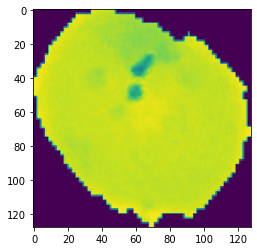

In [9]:
plt.imshow(saved[5].reshape(128,128))

In [10]:
from RPCA import RPCA
import random

s = np.reshape(saved, (27558,16384))

number_of_rows = s.shape[0]
random_indices = np.random.choice(number_of_rows, 
                                  size=100, 
                                  replace=False)
  
# Select 100 random rows from the array    
rows = s[random_indices, :]
rows.shape

X = rows
L,S = RPCA(X)

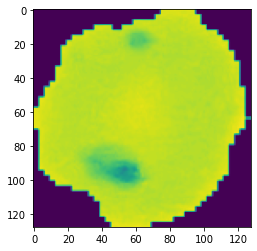

In [16]:
plt.imshow(X[3].reshape(128,128))

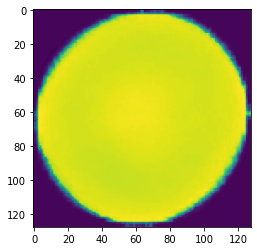

In [17]:
plt.imshow(L[3].reshape(128,128,))

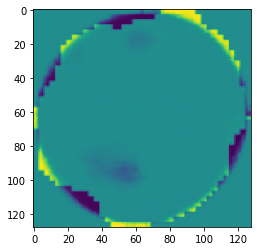

In [18]:
plt.imshow(S[3].reshape(128,128))

In [19]:
def plt_cell(image):
    return plt.imshow(image.reshape(128,128))

def cell_subplots(X):

    plt.figure(figsize=(5, 20))
    ncols = 5
    nrows = len(X) // ncols + (len(X) % ncols > 0)

    for i, x in enumerate(X):
        ax = plt.subplot(nrows, ncols, i + 1)
        ax.tick_params(
            bottom=False,
            left=False,
            labelbottom=False,
            labelleft=False
        )
        
        plt_cell(x)

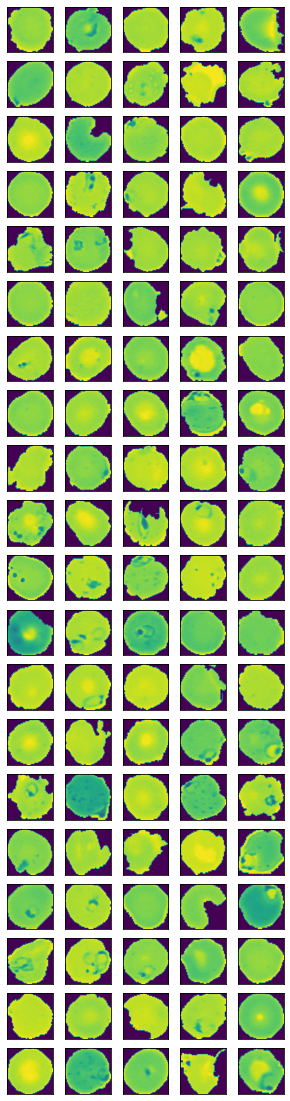

In [20]:
cell_subplots(X[0:100])

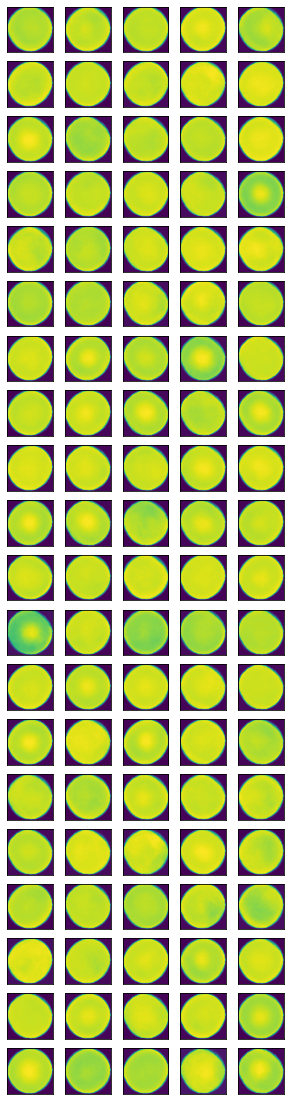

In [21]:
cell_subplots(L[0:100])

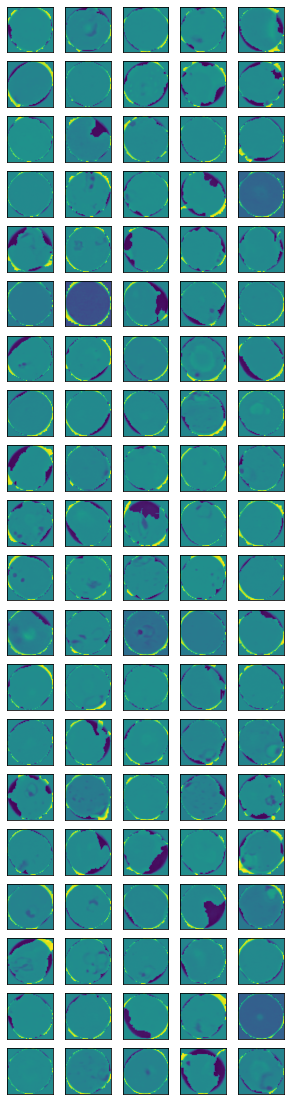

In [22]:
cell_subplots(S[0:100])